In [1]:
!git clone https://github.com/Amino21786/LMSMedicalSummerSchoolandConference.git

Cloning into 'LMSMedicalSummerSchoolandConference'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 58 (delta 4), reused 29 (delta 4), pack-reused 26 (from 1)
Receiving objects: 100% (58/58), 149.62 MiB | 24.18 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (39/39), done.


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

In [3]:
# Define paths:
pdf_dir = "/content/LMSMedicalSummerSchoolandConference/Summer School/CXRSChallenge/imagespdf"
dicom_dir = "/content/LMSMedicalSummerSchoolandConference/Summer School/CXRSChallenge/imagesdicom"

In [4]:
def rotate_image(img, angle):
    if angle == 0: return img
    elif angle == 90: return cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    elif angle == 180: return cv2.rotate(img, cv2.ROTATE_180)
    elif angle == 270: return cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

In [5]:
def orb_match_score(img1, img2):
    orb = cv2.ORB_create(1000)
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)
    if des1 is None or des2 is None: return 0
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    return len(matches)


In [6]:
def find_best_dicom_match(screenshot_path, dicom_dir):
    screenshot_orig = cv2.imread(screenshot_path, cv2.IMREAD_GRAYSCALE)
    best_score = -1
    best_match = None
    best_angle = 0
    best_dicom_img = None
    best_rotated_img = None

    for fname in sorted(os.listdir(dicom_dir)):
        if not fname.lower().endswith((".jpg", ".jpeg", ".png")): continue
        dcm_path = os.path.join(dicom_dir, fname)
        dcm_img = cv2.imread(dcm_path, cv2.IMREAD_GRAYSCALE)

        for angle in [0, 90, 180, 270]:
            rotated = rotate_image(screenshot_orig, angle)
            resized = cv2.resize(rotated, dcm_img.shape[::-1])
            score = orb_match_score(resized, dcm_img)

            print(f" {os.path.basename(screenshot_path)} vs {fname} @ {angle}° → Score: {score}")
            if score > best_score:
                best_score = score
                best_match = fname
                best_angle = angle
                best_dicom_img = dcm_img
                best_rotated_img = resized

    return best_match, best_angle, best_score, best_dicom_img, best_rotated_img

 pdf1_img1.jpeg vs pydicom1_img1.jpg @ 0° → Score: 16
 pdf1_img1.jpeg vs pydicom1_img1.jpg @ 90° → Score: 25
 pdf1_img1.jpeg vs pydicom1_img1.jpg @ 180° → Score: 14
 pdf1_img1.jpeg vs pydicom1_img1.jpg @ 270° → Score: 24
 pdf1_img1.jpeg vs pydicom1_img2.jpg @ 0° → Score: 21
 pdf1_img1.jpeg vs pydicom1_img2.jpg @ 90° → Score: 14
 pdf1_img1.jpeg vs pydicom1_img2.jpg @ 180° → Score: 21
 pdf1_img1.jpeg vs pydicom1_img2.jpg @ 270° → Score: 14
 pdf1_img1.jpeg vs pydicom1_img3.jpg @ 0° → Score: 18
 pdf1_img1.jpeg vs pydicom1_img3.jpg @ 90° → Score: 23
 pdf1_img1.jpeg vs pydicom1_img3.jpg @ 180° → Score: 18
 pdf1_img1.jpeg vs pydicom1_img3.jpg @ 270° → Score: 23
 pdf1_img1.jpeg vs pydicom1_img4.jpg @ 0° → Score: 19
 pdf1_img1.jpeg vs pydicom1_img4.jpg @ 90° → Score: 14
 pdf1_img1.jpeg vs pydicom1_img4.jpg @ 180° → Score: 19
 pdf1_img1.jpeg vs pydicom1_img4.jpg @ 270° → Score: 14
 pdf1_img1.jpeg vs pydicom1_img5.jpg @ 0° → Score: 20
 pdf1_img1.jpeg vs pydicom1_img5.jpg @ 90° → Score: 19
 pdf1_i

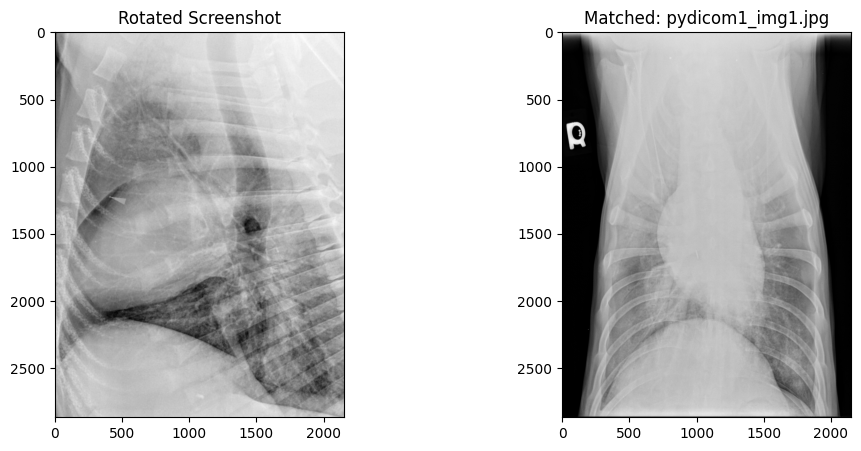

 pdf1_img2.jpeg vs pydicom1_img1.jpg @ 0° → Score: 50
 pdf1_img2.jpeg vs pydicom1_img1.jpg @ 90° → Score: 53
 pdf1_img2.jpeg vs pydicom1_img1.jpg @ 180° → Score: 49
 pdf1_img2.jpeg vs pydicom1_img1.jpg @ 270° → Score: 52
 pdf1_img2.jpeg vs pydicom1_img2.jpg @ 0° → Score: 47
 pdf1_img2.jpeg vs pydicom1_img2.jpg @ 90° → Score: 37
 pdf1_img2.jpeg vs pydicom1_img2.jpg @ 180° → Score: 47
 pdf1_img2.jpeg vs pydicom1_img2.jpg @ 270° → Score: 36
 pdf1_img2.jpeg vs pydicom1_img3.jpg @ 0° → Score: 46
 pdf1_img2.jpeg vs pydicom1_img3.jpg @ 90° → Score: 58
 pdf1_img2.jpeg vs pydicom1_img3.jpg @ 180° → Score: 46
 pdf1_img2.jpeg vs pydicom1_img3.jpg @ 270° → Score: 59
 pdf1_img2.jpeg vs pydicom1_img4.jpg @ 0° → Score: 62
 pdf1_img2.jpeg vs pydicom1_img4.jpg @ 90° → Score: 60
 pdf1_img2.jpeg vs pydicom1_img4.jpg @ 180° → Score: 63
 pdf1_img2.jpeg vs pydicom1_img4.jpg @ 270° → Score: 60
 pdf1_img2.jpeg vs pydicom1_img5.jpg @ 0° → Score: 74
 pdf1_img2.jpeg vs pydicom1_img5.jpg @ 90° → Score: 63
 pdf1_i

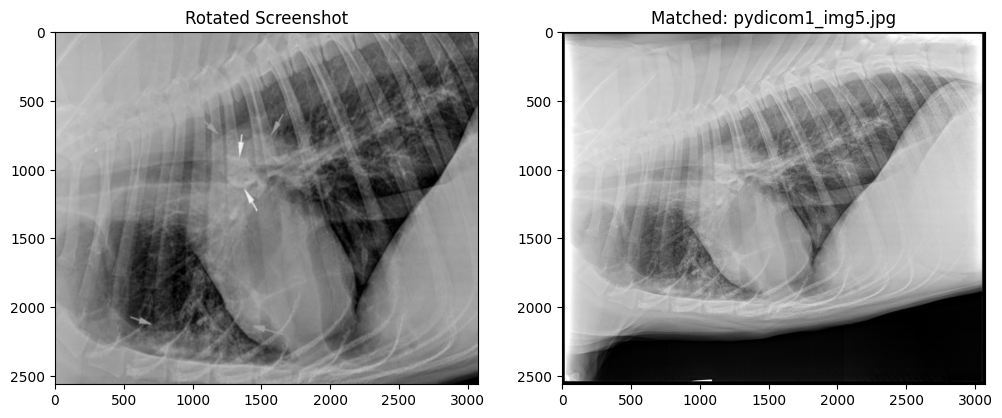

 pdf2_img1.png vs pydicom1_img1.jpg @ 0° → Score: 3
 pdf2_img1.png vs pydicom1_img1.jpg @ 90° → Score: 4
 pdf2_img1.png vs pydicom1_img1.jpg @ 180° → Score: 3
 pdf2_img1.png vs pydicom1_img1.jpg @ 270° → Score: 4
 pdf2_img1.png vs pydicom1_img2.jpg @ 0° → Score: 4
 pdf2_img1.png vs pydicom1_img2.jpg @ 90° → Score: 4
 pdf2_img1.png vs pydicom1_img2.jpg @ 180° → Score: 4
 pdf2_img1.png vs pydicom1_img2.jpg @ 270° → Score: 4
 pdf2_img1.png vs pydicom1_img3.jpg @ 0° → Score: 6
 pdf2_img1.png vs pydicom1_img3.jpg @ 90° → Score: 5
 pdf2_img1.png vs pydicom1_img3.jpg @ 180° → Score: 6
 pdf2_img1.png vs pydicom1_img3.jpg @ 270° → Score: 5
 pdf2_img1.png vs pydicom1_img4.jpg @ 0° → Score: 4
 pdf2_img1.png vs pydicom1_img4.jpg @ 90° → Score: 6
 pdf2_img1.png vs pydicom1_img4.jpg @ 180° → Score: 4
 pdf2_img1.png vs pydicom1_img4.jpg @ 270° → Score: 6
 pdf2_img1.png vs pydicom1_img5.jpg @ 0° → Score: 5
 pdf2_img1.png vs pydicom1_img5.jpg @ 90° → Score: 4
 pdf2_img1.png vs pydicom1_img5.jpg @ 180° 

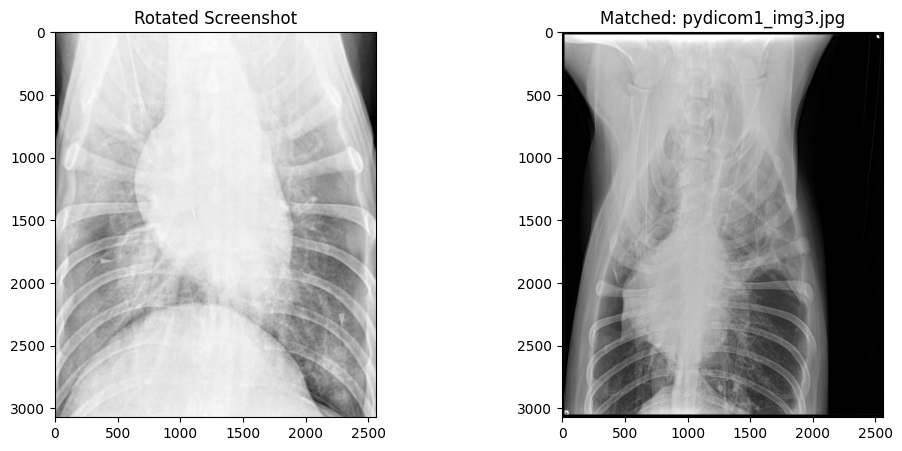

 pdf2_img2.jpeg vs pydicom1_img1.jpg @ 0° → Score: 63
 pdf2_img2.jpeg vs pydicom1_img1.jpg @ 90° → Score: 52
 pdf2_img2.jpeg vs pydicom1_img1.jpg @ 180° → Score: 63
 pdf2_img2.jpeg vs pydicom1_img1.jpg @ 270° → Score: 54
 pdf2_img2.jpeg vs pydicom1_img2.jpg @ 0° → Score: 80
 pdf2_img2.jpeg vs pydicom1_img2.jpg @ 90° → Score: 76
 pdf2_img2.jpeg vs pydicom1_img2.jpg @ 180° → Score: 80
 pdf2_img2.jpeg vs pydicom1_img2.jpg @ 270° → Score: 76
 pdf2_img2.jpeg vs pydicom1_img3.jpg @ 0° → Score: 70
 pdf2_img2.jpeg vs pydicom1_img3.jpg @ 90° → Score: 76
 pdf2_img2.jpeg vs pydicom1_img3.jpg @ 180° → Score: 71
 pdf2_img2.jpeg vs pydicom1_img3.jpg @ 270° → Score: 76
 pdf2_img2.jpeg vs pydicom1_img4.jpg @ 0° → Score: 105
 pdf2_img2.jpeg vs pydicom1_img4.jpg @ 90° → Score: 99
 pdf2_img2.jpeg vs pydicom1_img4.jpg @ 180° → Score: 105
 pdf2_img2.jpeg vs pydicom1_img4.jpg @ 270° → Score: 99
 pdf2_img2.jpeg vs pydicom1_img5.jpg @ 0° → Score: 97
 pdf2_img2.jpeg vs pydicom1_img5.jpg @ 90° → Score: 89
 pdf2

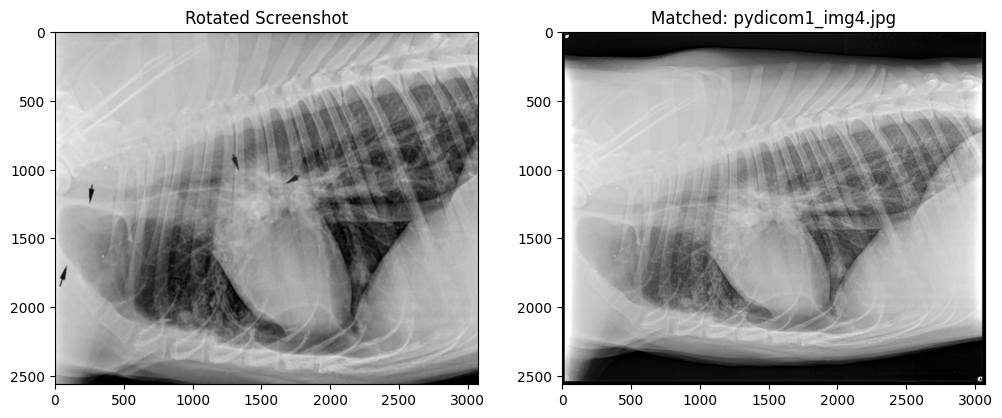

,pdf_image,matched_dicom,angle,score
0,pdf1_img1.jpeg,pydicom1_img1.jpg,90,25
1,pdf1_img2.jpeg,pydicom1_img5.jpg,0,74
2,pdf2_img1.png,pydicom1_img3.jpg,0,6
3,pdf2_img2.jpeg,pydicom1_img4.jpg,0,105


In [7]:
# Match all annotated screenshots to dicom images
pdf_images = sorted([
    os.path.join(pdf_dir, f) for f in os.listdir(pdf_dir)
    if f.lower().endswith((".jpg", ".jpeg", ".png"))
])

results = []

for screenshot_path in pdf_images:
    matched_file, angle, score, dcm_img, rotated_img = find_best_dicom_match(screenshot_path, dicom_dir)

    # Show result
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(rotated_img, cmap='gray')
    plt.title("Rotated Screenshot")

    plt.subplot(1, 2, 2)
    plt.imshow(dcm_img, cmap='gray')
    plt.title(f"Matched: {matched_file}")
    plt.show()

    results.append({
        'pdf_image': os.path.basename(screenshot_path),
        'matched_dicom': matched_file,
        'angle': angle,
        'score': score
    })

import pandas as pd
df = pd.DataFrame(results)
df.to_csv("/content/matching_results.csv", index=False)
df
